#1 Import thư viện

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


#2 Load data


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
data_path = '/content/drive/MyDrive/Chuyên đề công nghệ tt/dữ liệu/banking/train_renamed.csv'
data = pd.read_csv(data_path)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           45211 non-null  int64 
 1   job           45211 non-null  object
 2   marital       45211 non-null  object
 3   education     45211 non-null  object
 4   default       45211 non-null  object
 5   balance       45211 non-null  int64 
 6   housing       45211 non-null  object
 7   loan          45211 non-null  object
 8   contact       45211 non-null  object
 9   day           45211 non-null  int64 
 10  month         45211 non-null  object
 11  duration      45211 non-null  int64 
 12  campaign      45211 non-null  int64 
 13  pdays         45211 non-null  int64 
 14  previous      45211 non-null  int64 
 15  poutcome      45211 non-null  object
 16  subscription  45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
data.shape

(45211, 17)

In [ ]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscription
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


#3 Làm sạch dữ liệu

##3.1 Hiểu dữ liệu

In [ ]:
#kiểm tra dữ liệu cho các biế số
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


- Từ các thông số mô tả, có thể thấy rằng tập dữ liệu có sự mất cân bằng và sự biến động lớn giữa các biến, đặc biệt là trong biến duration và biến campaign
- có thể thấy rằng giá trị nhỏ nhất của duration là 0. Tuy nhiên, giá trị nhỏ nhất của campaign là 1. cần kiểm tra thêm biến duration có bao nhiều lần có cuộc goị là 0s.

In [ ]:
# kiểm tra các giá trị duy nhất
categorical_columns = data.select_dtypes(include=['object']).columns
print("\nGiá trị duy nhất của các cột phân loại:")
for col in categorical_columns:
    print(f"\nCột: {col}")
    print("Giá trị duy nhất:")
    for value in data[col].unique():
        print(f" - {value}")
    print("-" * 50)



Giá trị duy nhất của các cột phân loại:

Cột: job
Giá trị duy nhất:
 - management
 - technician
 - entrepreneur
 - blue-collar
 - unknown
 - retired
 - admin.
 - services
 - self-employed
 - unemployed
 - housemaid
 - student
--------------------------------------------------

Cột: marital
Giá trị duy nhất:
 - married
 - single
 - divorced
--------------------------------------------------

Cột: education
Giá trị duy nhất:
 - tertiary
 - secondary
 - unknown
 - primary
--------------------------------------------------

Cột: default
Giá trị duy nhất:
 - no
 - yes
--------------------------------------------------

Cột: housing
Giá trị duy nhất:
 - yes
 - no
--------------------------------------------------

Cột: loan
Giá trị duy nhất:
 - no
 - yes
--------------------------------------------------

Cột: contact
Giá trị duy nhất:
 - unknown
 - cellular
 - telephone
--------------------------------------------------

Cột: month
Giá trị duy nhất:
 - may
 - jun
 - jul
 - aug
 - oct
 - no

##3.2 Kiểm tra giá trị thiếu

In [ ]:
data.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [ ]:
duplicates = data.duplicated().sum()
print(f"Số lượng dữ liệu trùng lặp ban đầu: {duplicates}")

Số lượng dữ liệu trùng lặp ban đầu: 0


##3.3 Kiểm tra giá trị ngoại lệ

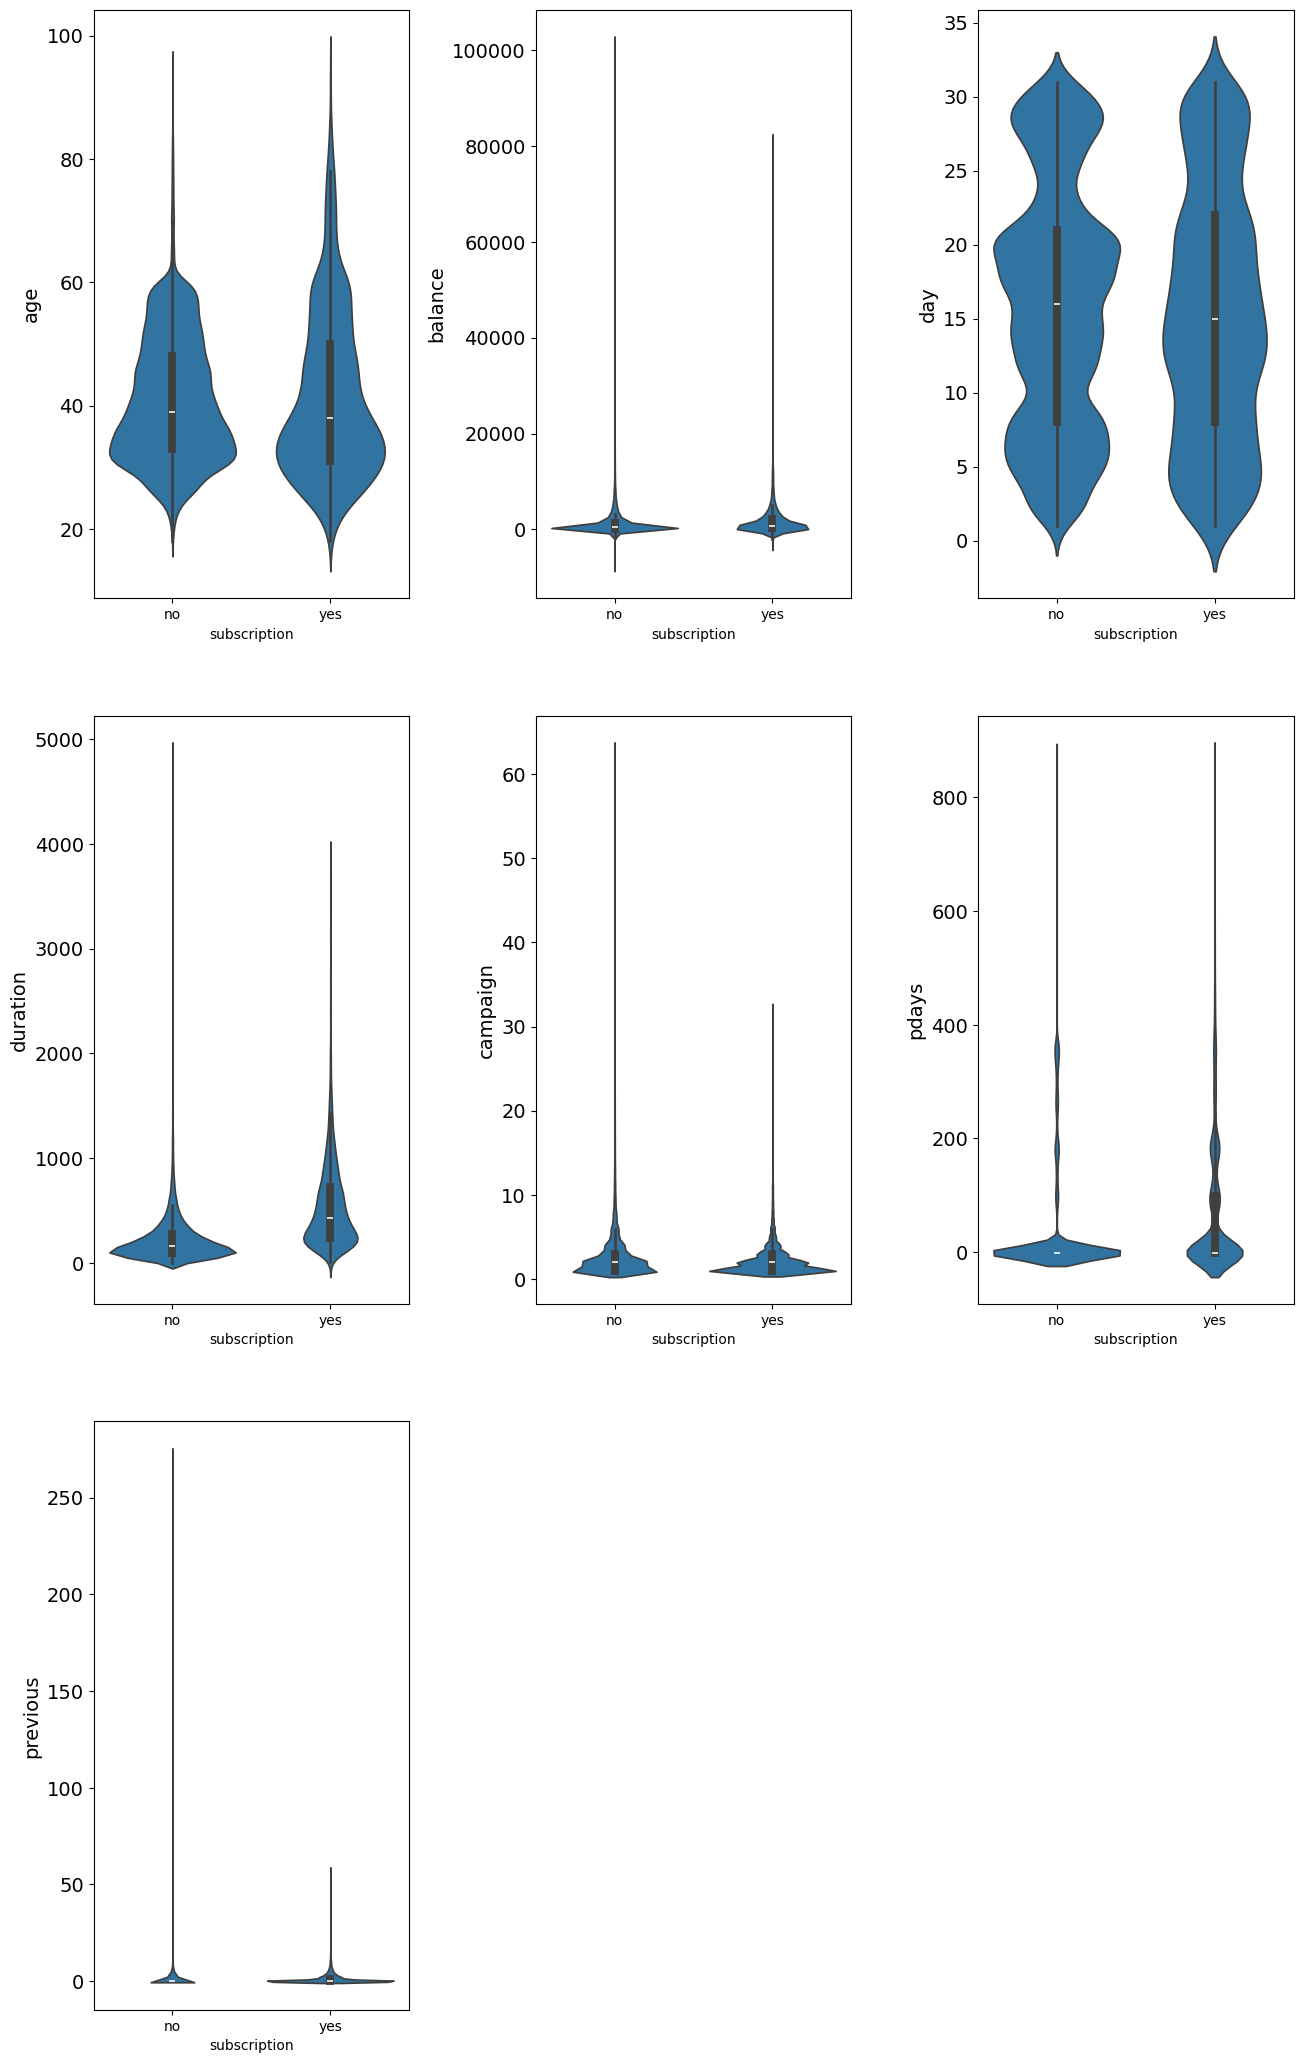

In [ ]:
df_num = data.select_dtypes('int').columns
plt.figure(figsize = (15, 25))
for idx, col in enumerate(df_num):
    plt.subplot(3, 3, idx + 1)
    if col == 'previous_idle_days':
        ax = sns.violinplot(data = data, y = data[data[col] > -1][col], x = data.subscription, inner = 'box')
    elif col == 'previous_contact_count':
        ax = sns.violinplot(data = data, y = data[data[col] > 0][col], x = data.subscription, inner = 'box')
    else:
        ax = sns.violinplot(data = data, y = data[col], x = data.subscription)
    #plt.axhline(df[col].mean(), color='red', linewidth=3)
    #plt.axhline(df[col].median(), color='green', linewidth=3)
    plt.ylabel(col, fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.2)

- nBiểu đồ cho thấy thời gian cuộc gọi (duration) là yếu tố quan trọng nhất, nhóm  khách hàng đăng ký thường có thời gian cuộc gọi lâu hơn.
- Biến age(tuổi) cũng là biến tác động nhiều đến biến mục tiêu subscription, cho  những khách hàng trong khoảng độ tuổi trung niên có xu hướng quyết định đăng ký nhiều hơn.
- Ngoài ra, một số biến có giá trị ngoại lệ cao  như balance  , duration , campaign và previous những giá trị này cần được xem xét thêm  và loại bỏ.

In [ ]:
#xử lý các ngoại lệ
def outlier_density(data,col_name):
    #print("Orig DF Size:"+ str(data.shape))
    if col_name == 'previous_idle_days':
        Q1 = np.quantile(data[data[col_name] > -1][col_name],0.25)
        Q3 = np.quantile(data[data[col_name] > -1][col_name],0.75)
    elif col_name == 'previous_contact_count':
        Q1 = np.quantile(data[data[col_name] > 0][col_name],0.25)
        Q3 = np.quantile(data[data[col_name] > 0][col_name],0.75)
    else:
        Q1 = np.quantile(data[col_name],0.25)
        Q3 = np.quantile(data[col_name],0.75)

    IQR = Q3 - Q1

    lower_limit = Q1 - (1.5*IQR)
    upper_limit = Q3 + (1.5*IQR)

    print("Lower Limit: %.2f" % lower_limit)
    print("Upper Limit: %.2f" % upper_limit)

    df_new = data[(data[col_name] > lower_limit) & (data[col_name] < upper_limit)]
    #print("New DF Size:"+ str(df_new.shape))
    print('Outlier count for ' + col_name + ': ' + str(data.shape[0] - df_new.shape[0]))
    print('Outlier density for ' + col_name + ': ' + str(round((1 - df_new.shape[0] / data.shape[0]) * 100, 4)) + '%')
    print('========')

In [ ]:
for col in df_num:
    outlier_density(data, col)

Lower Limit: 10.50
Upper Limit: 70.50
Outlier count for age: 487
Outlier density for age: 1.0772%
Lower Limit: -1962.00
Upper Limit: 3462.00
Outlier count for balance: 4731
Outlier density for balance: 10.4643%
Lower Limit: -11.50
Upper Limit: 40.50
Outlier count for day: 0
Outlier density for day: 0.0%
Lower Limit: -221.00
Upper Limit: 643.00
Outlier count for duration: 3247
Outlier density for duration: 7.1819%
Lower Limit: -2.00
Upper Limit: 6.00
Outlier count for campaign: 4355
Outlier density for campaign: 9.6326%
Lower Limit: -1.00
Upper Limit: -1.00
Outlier count for pdays: 45211
Outlier density for pdays: 100.0%
Lower Limit: 0.00
Upper Limit: 0.00
Outlier count for previous: 45211
Outlier density for previous: 100.0%


- Các biến balance (trung bình số dư hàng năm), duration (thời gian liên hệ cuối cùng), và campaign (chiến dịch) có một lượng lớn giá trị ngoại lệ. nhưng cần phân tích thêm để xem những ngoại lệ này có cần  loại bỏ.

#4 EDA

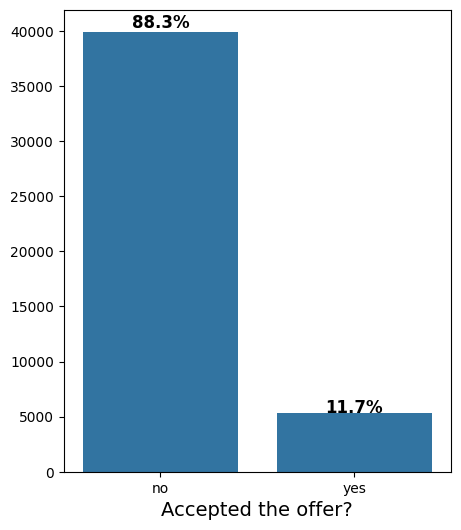

In [ ]:
plt.figure(figsize=(5,6))
ax = sns.countplot(data = data, x = data.subscription)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{round(height * 100 / data.shape[0], 2)}%', (x + width/2, y + height * 1.01), ha='center', weight = 'bold', fontsize = 12)
plt.xlabel(r'Accepted the offer?', fontsize = 14)
plt.ylabel(r'')
plt.show()

- Có sự mất cân bằng lớn giữa các biến  mục tiêu trong dữ liệu.

In [ ]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'subscription'],
      dtype='object')

- thêm cột quarter để xác định quý của lần liên hệ cuối cùng dựa trên tháng (month)

In [ ]:
data['lquarter'] = np.where((data['month'] == 'jan') | (data['month'] == 'feb') | (data['month'] == 'mar') , '1',
                             np.where((data['month'] == 'apr') | (data['month'] == 'may') | (data['month'] == 'jun') , '2',
                             np.where((data['month'] == 'jul') | (data['month'] == 'aug') | (data['month'] == 'sep') , '3',
                                    '4')))

- Kiểm tra xem  những khách hàng không được liên hệ trong chiến dịch trước đó

In [ ]:
data[data['pdays'] == -1]['poutcome'].value_counts()

,count
poutcome,
unknown,36954


- Có thể thấy rằng có  36954/36959 khách hàng không được gọi trong chiến dịch trước đó.

-  tạo ra một cột "contacted" để xem liệu khách hàng có được liên hệ trong chiến dịch trước đó hay không.

In [ ]:

data['contacted'] = np.where(data['pdays'] > -1 , '1', '0')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscription,lquarter,contacted
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,2,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,2,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,2,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,2,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,2,0


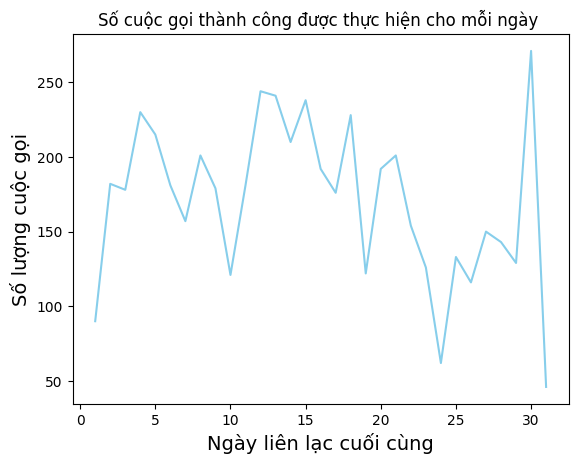

In [ ]:

contact_day_sum = data.groupby(['day', 'subscription'], as_index = False)['age'].count()
contact_day_sum.rename(columns = {'age':'count'}, inplace = True)
contact_day_sum

sns.lineplot(data=contact_day_sum[contact_day_sum['subscription'] == 'yes'],
            x='day', y='count', color='skyblue')
plt.xlabel('Ngày liên lạc cuối cùng', fontsize=14)
plt.ylabel('Số lượng cuộc gọi', fontsize=14)
plt.title('Số cuộc gọi thành công được thực hiện cho mỗi ngày ')
plt.show()

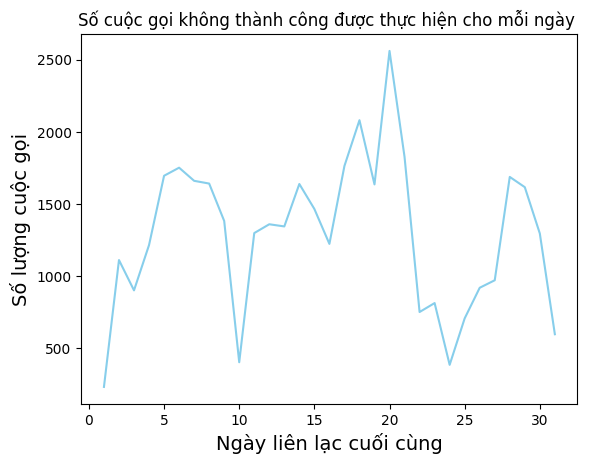

In [ ]:

sns.lineplot(data=contact_day_sum[contact_day_sum['subscription'] == 'no'],
            x='day', y='count', color='skyblue')
plt.xlabel('Ngày liên lạc cuối cùng', fontsize=14)
plt.ylabel('Số lượng cuộc gọi', fontsize=14)
plt.title('Số cuộc gọi không thành công được thực hiện cho mỗi ngày ')
plt.show()

In [ ]:
df = data.select_dtypes('object')
df.drop('subscription', axis = 1, inplace = True)

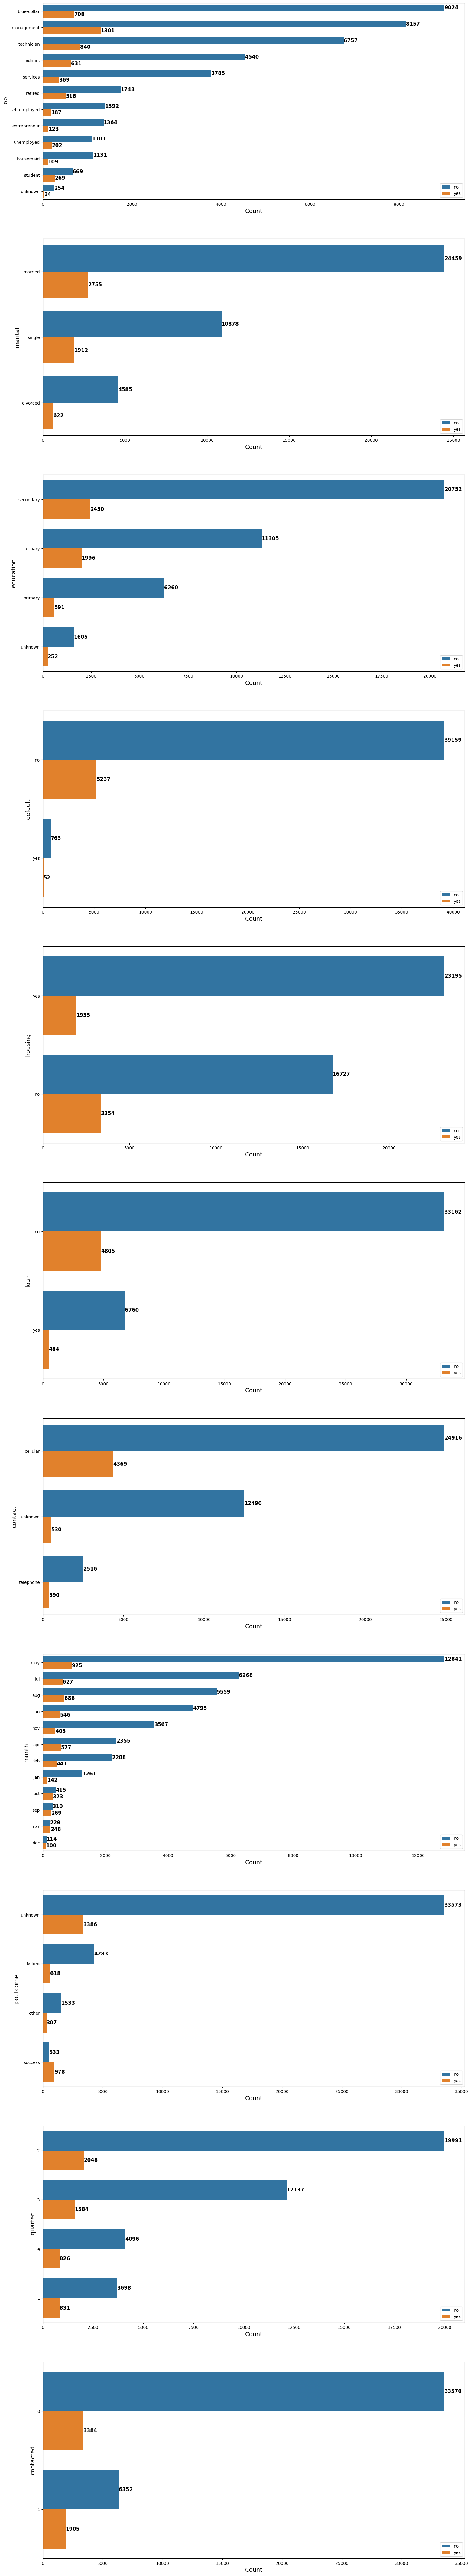

In [ ]:
plt.figure(figsize=(18,120))
for idx, col in enumerate(df.columns):
    plt.subplot(12,1,idx + 1)
    ax = sns.countplot(data = data, y = df[col], hue = data['subscription'],
                       order = df[col].value_counts().index);
    plt.ylabel(col, fontsize = 14)
    plt.xlabel('Count', fontsize = 14)
    for col in ax.containers:     #to set a label on top of the bars.
        ax.bar_label(col, weight = 'bold', fontsize = 12)
    plt.legend(loc = 'lower right')


#4 Mã Hóa Nhãn Các Cột Phân Loại

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Mã hóa các cột còn lại
label_encoders = {}
for col in data.select_dtypes(include=['object']).columns:
    if col != 'subscription':
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
        label_encoders[col] = le


In [ ]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscription,lquarter,contacted
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,no,1,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,no,1,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,no,1,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,no,1,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,no,1,0


In [ ]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'subscription', 'lquarter', 'contacted'],
      dtype='object')

##5 Chuẩn Hóa Dữ Liệu StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])


In [ ]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscription,lquarter,contacted
0,1.606965,-0.103820,-0.275762,1.036362,-0.13549,0.256419,0.893915,-0.436803,1.514306,-1.298476,0.823773,0.011016,-0.569351,-0.411453,-0.25194,0.444898,no,-0.517549,-0.472694
1,0.288529,1.424008,1.368372,-0.300556,-0.13549,-0.437895,0.893915,-0.436803,1.514306,-1.298476,0.823773,-0.416127,-0.569351,-0.411453,-0.25194,0.444898,no,-0.517549,-0.472694
2,-0.747384,-0.714951,-0.275762,-0.300556,-0.13549,-0.446762,0.893915,2.289359,1.514306,-1.298476,0.823773,-0.707361,-0.569351,-0.411453,-0.25194,0.444898,no,-0.517549,-0.472694
3,0.571051,-1.020516,-0.275762,2.373280,-0.13549,0.047205,0.893915,-0.436803,1.514306,-1.298476,0.823773,-0.645231,-0.569351,-0.411453,-0.25194,0.444898,no,-0.517549,-0.472694
4,-0.747384,2.035139,1.368372,2.373280,-0.13549,-0.447091,-1.118674,-0.436803,1.514306,-1.298476,0.823773,-0.233620,-0.569351,-0.411453,-0.25194,0.444898,no,-0.517549,-0.472694


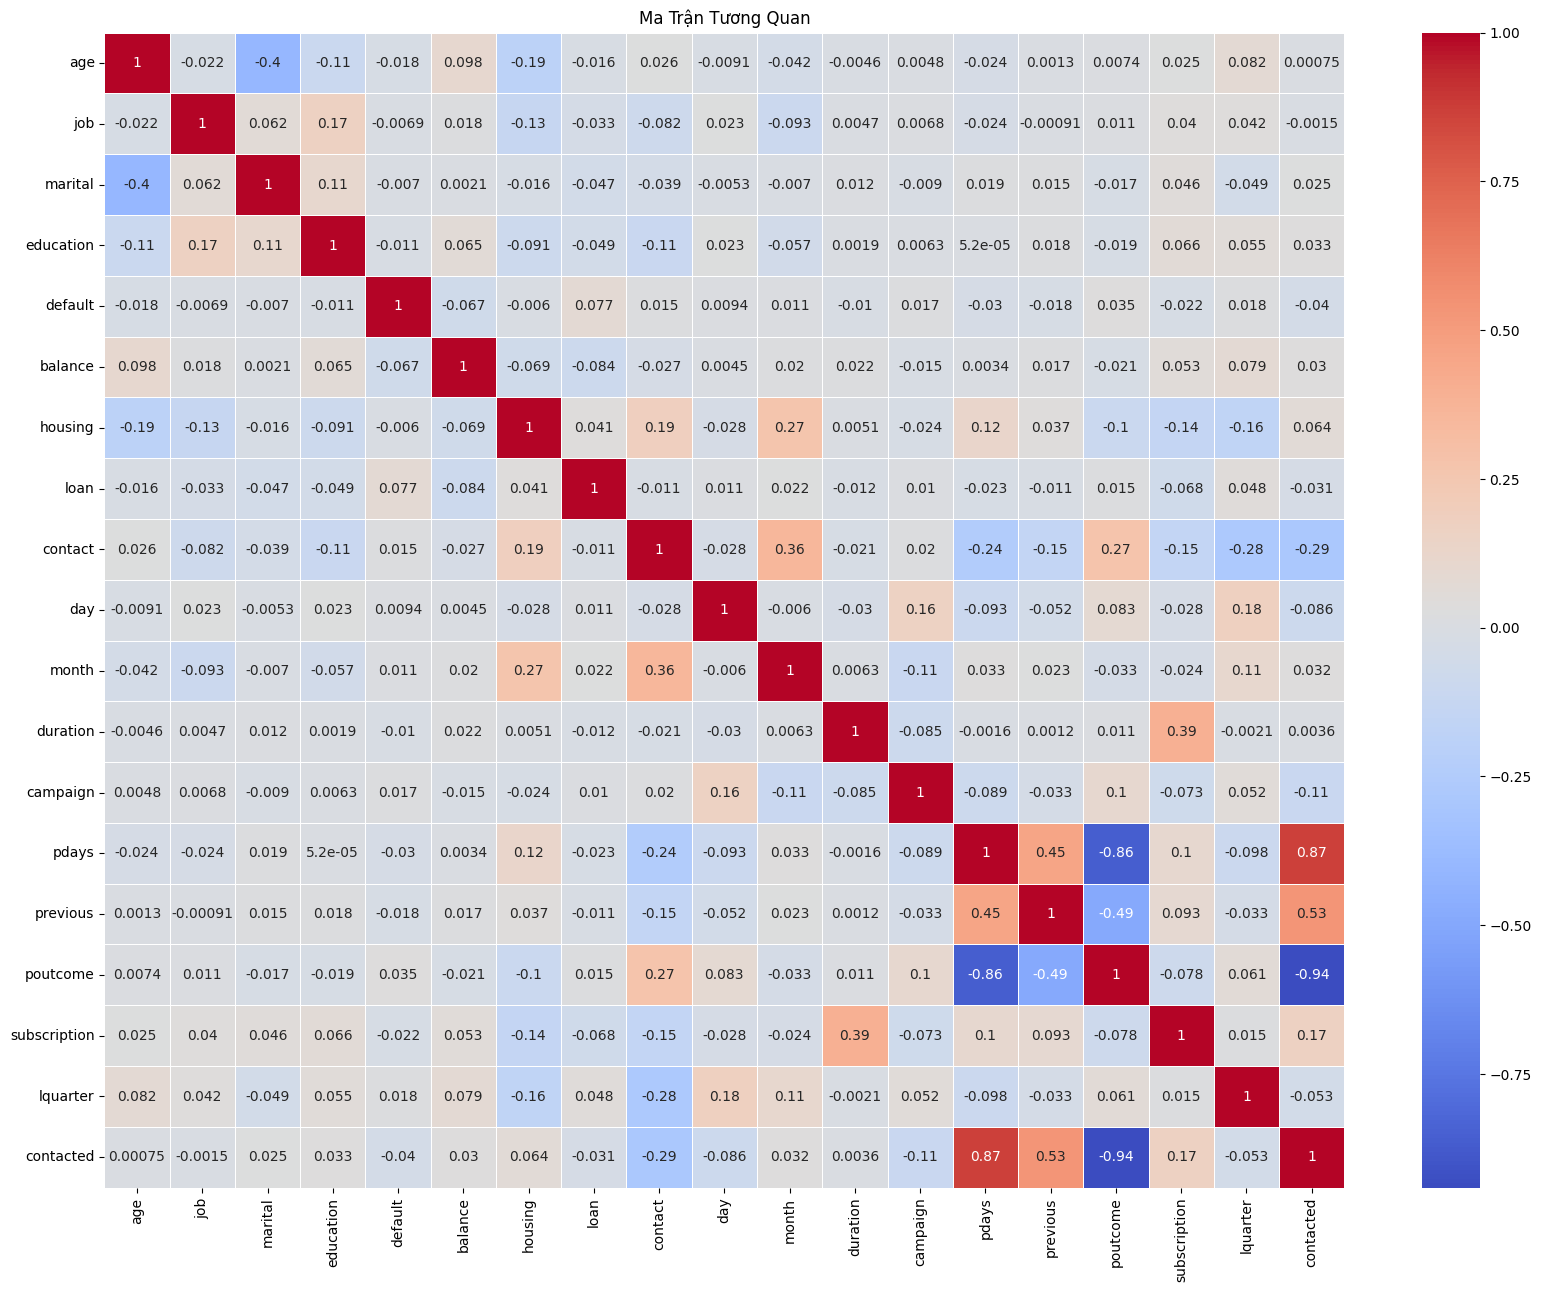

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

plt.figure(figsize=(20, 15))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Ma Trận Tương Quan')
plt.show()


- Mối tương quan mạnh giữa biến "duration" và "subscription" (0.87) cho thấy thời gian cuộc gọi có ảnh hưởng lớn đến khả năng khách hàng chấp nhận dịch vụ.
- Biến "contacted" có tương quan dương với "contact" (0.36), cho thấy khách hàng đã từng được liên hệ có khả năng chấp nhận dịch vụ cao hơn.
- Biến "previous" và "pdays" có tương quan âm mạnh (-0.86), cho thấy khách hàng đã được liên hệ nhiều lần trong quá khứ có xu hướng ít được tiếp cận trong chiến dịch hiện tại.

#5 Lựa Chọn Thuật Toán Phù Hợp


##5.1 Logistic Regression

In [ ]:
pip install imbalanced-learn


**Logistic Regression** là một thuật toán phân loại nhị phân, thường được sử dụng để dự đoán khả năng xảy ra của một sự kiện với hai kết quả có thể (0 hoặc 1). Thuật toán này hoạt động bằng cách tính toán một tổ hợp tuyến tính của các đặc trưng đầu vào, sau đó áp dụng hàm sigmoid để chuyển đổi kết quả đó thành xác suất nằm trong khoảng từ 0 đến 1.

Dựa trên các đặc trưng như tuổi, nghề nghiệp, tình trạng hôn nhân, trình độ học vấn, số dư tài khoản,... Logistic Regression sẽ tính toán xác suất người đó đăng ký dịch vụ.

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [ ]:

X = data.drop(columns=['subscription'])
y = data['subscription']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_smote, y_train_smote)

y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8296
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.84      0.90     11966
           1       0.39      0.79      0.52      1598

    accuracy                           0.83     13564
   macro avg       0.68      0.81      0.71     13564
weighted avg       0.90      0.83      0.85     13564



Tunning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

param_grid = [
    {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l2'], 'solver': ['lbfgs']},
    {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}
]

grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_smote, y_train_smote)

print(f"Best parameters: {grid_search.best_params_}")
best_model_logic = grid_search.best_estimator_

best_model_logic.fit(X_train_smote, y_train_smote)

y_pred_optimized = best_model_logic.predict(X_test)
print(f"Optimized Accuracy: {accuracy_score(y_test, y_pred_optimized):.4f}")
print("Optimized Classification Report:")
print(classification_report(y_test, y_pred_optimized))


Best parameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
Optimized Accuracy: 0.8287
Optimized Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.83      0.90     11966
           1       0.39      0.79      0.52      1598

    accuracy                           0.83     13564
   macro avg       0.68      0.81      0.71     13564
weighted avg       0.90      0.83      0.85     13564



Sau tuuning, độ chính xác đã thay đổi. Từ đó ta sử dụng kết quả sau tunning để đánh giá mô hình.

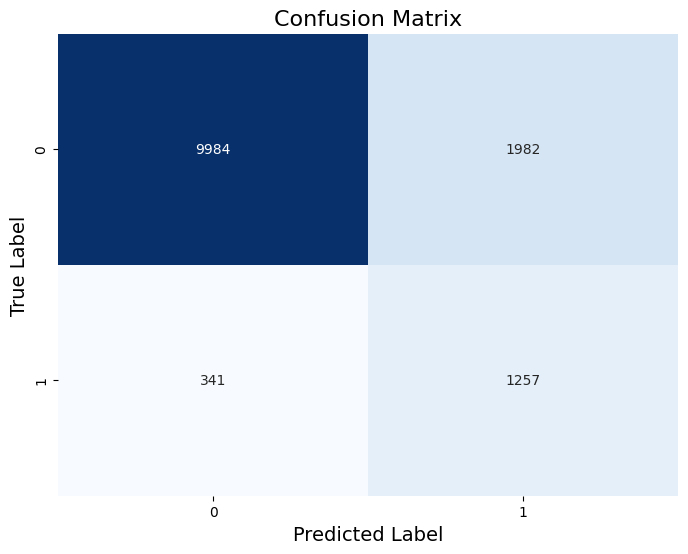

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_optimized)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.show()


##5.2 Decision Tree

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
X = data.drop(columns=['subscription'])
y = data['subscription']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_smote, y_train_smote)

y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8625
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.91      0.92     11966
           1       0.43      0.54      0.48      1598

    accuracy                           0.86     13564
   macro avg       0.68      0.72      0.70     13564
weighted avg       0.88      0.86      0.87     13564



Tunning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_smote, y_train_smote)

print(f"Best parameters: {grid_search.best_params_}")
best_model_tree = grid_search.best_estimator_

best_model_tree.fit(X_train_smote, y_train_smote)

y_pred_optimized = best_model_tree.predict(X_test)
print(f"Optimized Accuracy: {accuracy_score(y_test, y_pred_optimized):.4f}")
print("Optimized Classification Report:")
print(classification_report(y_test, y_pred_optimized))


Best parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2}
Optimized Accuracy: 0.8669
Optimized Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.91      0.92     11966
           1       0.45      0.55      0.49      1598

    accuracy                           0.87     13564
   macro avg       0.69      0.73      0.71     13564
weighted avg       0.88      0.87      0.87     13564



Sau tuuning, độ chính xác đã thay đổi. Từ đó ta sử dụng kết quả sau tunning để đánh giá mô hình.

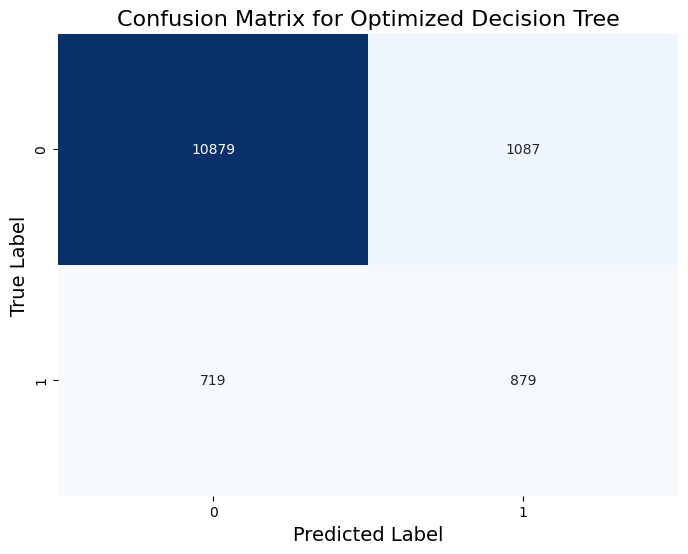

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_optimized)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Optimized Decision Tree', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.show()


##5.3 Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
X = data.drop(columns=['subscription'])
y = data['subscription']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9053
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     11966
           1       0.68      0.37      0.48      1598

    accuracy                           0.91     13564
   macro avg       0.80      0.67      0.71     13564
weighted avg       0.89      0.91      0.89     13564



Tunning

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True],
    'class_weight': ['balanced']
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
best_model_rf = grid_search.best_estimator_

best_model_rf.fit(X_train, y_train)

y_pred_optimized = best_model_rf.predict(X_test)
print(f"Optimized Accuracy: {accuracy_score(y_test, y_pred_optimized):.4f}")
print("Optimized Classification Report:")
print(classification_report(y_test, y_pred_optimized))


Best parameters: {'bootstrap': True, 'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Optimized Accuracy: 0.8546
Optimized Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.86      0.91     11966
           1       0.44      0.83      0.57      1598

    accuracy                           0.85     13564
   macro avg       0.71      0.84      0.74     13564
weighted avg       0.91      0.85      0.87     13564



Sau tuuning, độ chính xác đã thay đổi. Từ đó ta sử dụng kết quả sau tunning để đánh giá mô hình.

Bài toán yêu cầu phát hiện chính xác tất cả các khách hàng có khả năng đăng ký (ví dụ  muốn tiếp cận đúng đối tượng khách hàng), thì mô hình sau khi tuning  phù hợp hơn vì nó có recall cao, tức là ít bỏ sót khách hàng tiềm năng.

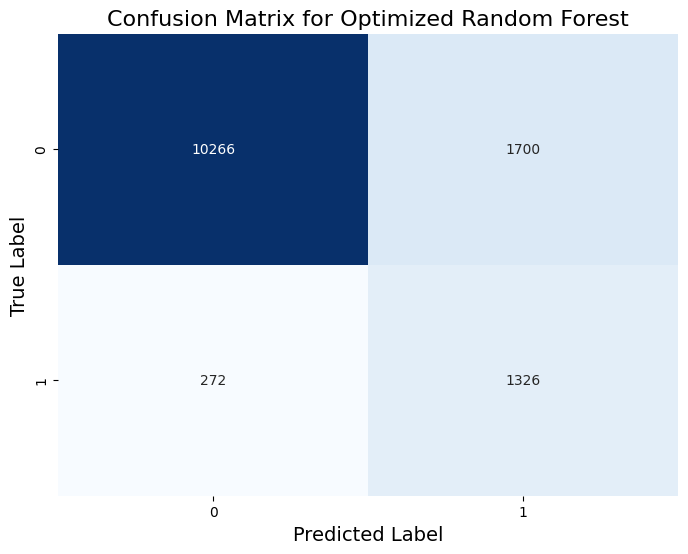

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_optimized)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Optimized Random Forest', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.show()


##5.4 XGBoost

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
X = data.drop(columns=['subscription'])
y = data['subscription']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = xgb.XGBClassifier(eval_metric='logloss', scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]))
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8803
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.89      0.93     11966
           1       0.50      0.79      0.61      1598

    accuracy                           0.88     13564
   macro avg       0.73      0.84      0.77     13564
weighted avg       0.91      0.88      0.89     13564



Tunning

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8],
    'colsample_bytree': [0.8],
    'scale_pos_weight': [1]
}

grid_search = GridSearchCV(xgb.XGBClassifier(eval_metric='logloss'), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
best_model_xg = grid_search.best_estimator_

best_model_xg.fit(X_train, y_train)

y_pred_optimized = best_model_xg.predict(X_test)
print(f"Optimized Accuracy: {accuracy_score(y_test, y_pred_optimized):.4f}")
print("Optimized Classification Report:")
print(classification_report(y_test, y_pred_optimized))


Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'scale_pos_weight': 1, 'subsample': 0.8}
Optimized Accuracy: 0.9067
Optimized Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     11966
           1       0.65      0.45      0.53      1598

    accuracy                           0.91     13564
   macro avg       0.79      0.71      0.74     13564
weighted avg       0.90      0.91      0.90     13564



Sau tuuning, độ chính xác đã thay đổi. Từ đó ta sử dụng kết quả sau tunning để đánh giá mô hình.

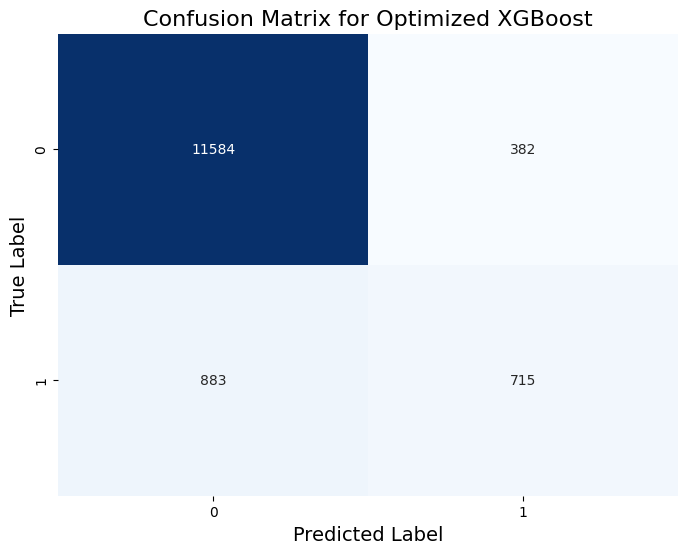

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_optimized)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Optimized XGBoost', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.show()


#5.5 Đánh giá mô hình

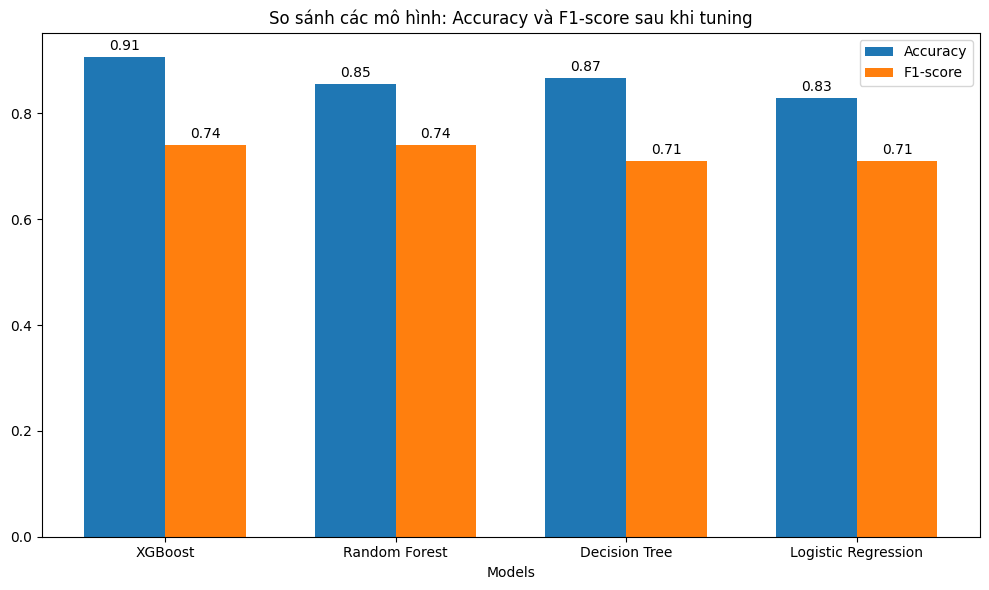

In [ ]:
import matplotlib.pyplot as plt
import numpy as np



models = ['XGBoost', 'Random Forest', 'Decision Tree', 'Logistic Regression']
accuracies = [0.9067, 0.8546, 0.8669, 0.8287]
f1_scores = [0.74, 0.74, 0.71, 0.71]

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar(x - width/2, accuracies, width, label='Accuracy')
rects2 = ax.bar(x + width/2, f1_scores, width, label='F1-score')

ax.set_xlabel('Models')
ax.set_title('So sánh các mô hình: Accuracy và F1-score sau khi tuning')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()


**Kết quả: mô hình nào là tốt nhất?**

**Nhận xét:**

1. XGBoost có accuracy cao nhất (0.91) và F1-score tốt (0.74), là mô hình hiệu quả nhất.

2. Random Forest có accuracy thấp hơn XGBoost (0.85) nhưng F1-score tương đương (0.74), ổn định và đáng tin cậy.

3. Decision Tree và Logistic Regression có accuracy và F1-score thấp hơn (0.83 và 0.71), kém hiệu quả hơn so với hai mô hình trên.

**Kết luận:** XGBoost là lựa chọn tốt nhất.

#6. Kết quả phân tích

##6.1 Phân tích các yếu tố ảnh hưởng

1. duration (0.16169650852680206)
2. poutcome (0.1569889336824417)
3. contact (0.15389345586299896)
4. housing (0.10469428449869156)
5. loan (0.05915560573339462)
6. month (0.05814491584897041)
7. previous (0.051336441189050674)
8. lquarter (0.04203622043132782)
9. pdays (0.037635765969753265)
10. age (0.029030214995145798)
11. campaign (0.02400640957057476)
12. day (0.022967834025621414)
13. education (0.02001209743320942)
14. balance (0.01892944425344467)
15. default (0.01658981665968895)
16. marital (0.015750572085380554)
17. job (0.014021128416061401)
18. contacted (0.013110324740409851)


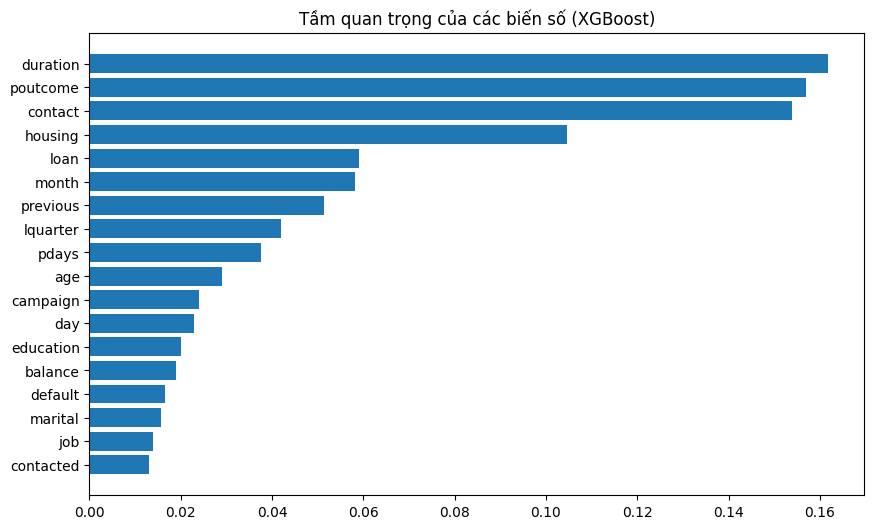

In [ ]:
# Đánh giá tầm quan trọng của các biến số sử dụng XGBoost
importances = best_model_xg.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X_train.columns

for f in range(X_train.shape[1]):
    print(f"{f + 1}. {feature_names[indices[f]]} ({importances[indices[f]]})")

plt.figure(figsize=(10, 6))
plt.title("Tầm quan trọng của các biến số (XGBoost)")
plt.barh(range(X_train.shape[1]), importances[indices], align="center")
plt.yticks(range(X_train.shape[1]), feature_names[indices])
plt.gca().invert_yaxis()
plt.show()


Những yếu tố quan trọng nhất như **duration**, **poutcome**, và **contact** cho thấy rằng thời gian liên lạc, kết quả chiến dịch trước, và phương thức liên hệ là những yếu tố quyết định lớn nhất trong việc đăng ký tiền gửi của khách hàng. Những yếu tố này sẽ rất hữu ích để tối ưu hóa chiến lược tiếp thị của bạn.

##6.2 Hiệu suất của mô hình dự đoán:

In [ ]:
# Đánh giá hiệu suất của mô hình XGBoost
from sklearn.metrics import accuracy_score, classification_report

y_pred_optimized = best_model_xg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_optimized)
report = classification_report(y_test, y_pred_optimized)

print(f"Độ chính xác (Accuracy): {accuracy:.4f}")
print("Báo cáo phân loại (Classification Report):")
print(report)


Độ chính xác (Accuracy): 0.9067
Báo cáo phân loại (Classification Report):
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     11966
           1       0.65      0.45      0.53      1598

    accuracy                           0.91     13564
   macro avg       0.79      0.71      0.74     13564
weighted avg       0.90      0.91      0.90     13564



**Khả năng ứng dụng của thuật toán**
1. Phân loại khách hàng tiềm năng: XGBoost dự đoán chính xác nhóm khách hàng có khả năng đăng ký tiền gửi, giúp tối ưu hóa chi phí và tập trung nguồn lực vào các khách hàng tiềm năng.

2. Tùy chỉnh chiến dịch tiếp thị: Dựa trên các yếu tố quan trọng (như duration, poutcome), doanh nghiệp có thể tối ưu nội dung và phương thức tiếp cận khách hàng, từ đó cải thiện hiệu quả chiến dịch.

3. Ra quyết định nhanh và tự động: XGBoost hỗ trợ ra quyết định tự động trong thời gian thực, giúp doanh nghiệp triển khai chiến dịch tiếp thị và phân bổ tài nguyên hiệu quả hơn.

4. Phát hiện xu hướng: Mô hình giúp phân tích hành vi khách hàng và điều chỉnh sản phẩm dịch vụ theo nhu cầu thực tế, từ đó tối ưu hóa chiến lược phát triển sản phẩm.

5. Tính linh hoạt và tổng quát hóa tốt: XGBoost có khả năng tổng quát tốt, phù hợp cho dữ liệu mới và áp dụng được trên quy mô lớn.

##6.3 Đưa ra khách hàng tiềm năng

In [ ]:
if 'probability' in X_test.columns:
    X_test = X_test.drop(columns=['probability'])

probabilities = best_model_xg.predict_proba(X_test)[:, 1]

X_test['probability'] = probabilities

threshold = 0.8
potential_customers = X_test[X_test['probability'] > threshold].copy()

print(potential_customers.head())


            age       job   marital  education  default   balance   housing  \
41828 -1.029906 -0.103820  1.368372   1.036362 -0.13549 -0.271378 -1.118674   
43708  2.266183  0.201746 -0.275762   2.373280 -0.13549 -0.224411 -1.118674   
44583 -1.594950  1.118442  1.368372  -0.300556 -0.13549 -0.305863 -1.118674   
41149  0.759399  1.424008  1.368372  -0.300556 -0.13549  2.551531  0.893915   
44501  1.418617  1.424008 -1.919895  -0.300556 -0.13549  0.685685 -1.118674   

           loan   contact       day     month  duration  campaign     pdays  \
41828 -0.436803 -0.713012 -0.096898  1.488915 -0.054997 -0.569351  0.647196   
43708 -0.436803 -0.713012 -0.337213  0.823773  1.300212 -0.246560  1.376265   
44583 -0.436803 -0.713012  0.383734 -1.504223  0.620666  2.658552  1.446176   
41149 -0.436803 -0.713012  0.263576 -1.504223  1.063341 -0.569351  4.202658   
44501 -0.436803 -0.713012 -0.697687 -1.504223  0.966263 -0.569351  1.406227   

       previous  poutcome  lquarter  contacted  pr

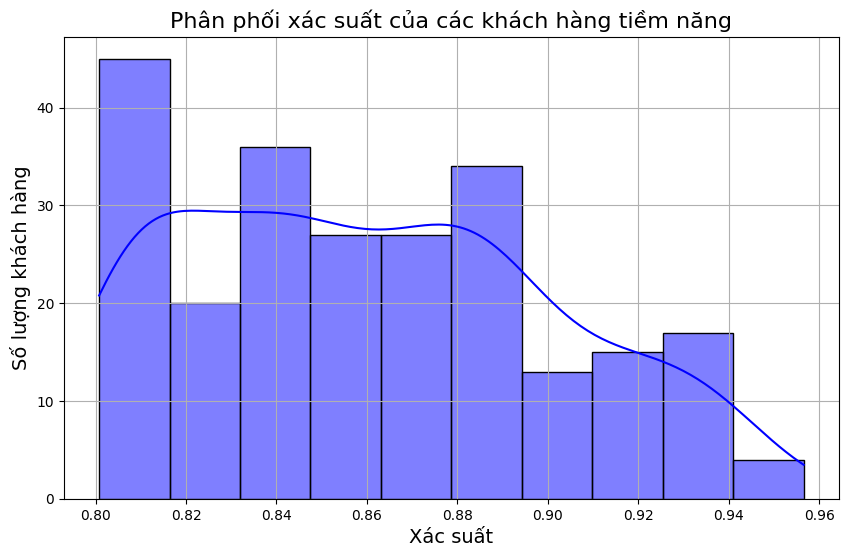

In [ ]:
# Vẽ biểu đồ phân phối xác suất của khách hàng tiềm năng
plt.figure(figsize=(10, 6))
sns.histplot(potential_customers['probability'], bins=10, kde=True, color='blue')
plt.title('Phân phối xác suất của các khách hàng tiềm năng', fontsize=16)
plt.xlabel('Xác suất', fontsize=14)
plt.ylabel('Số lượng khách hàng', fontsize=14)
plt.grid(True)
plt.show()


**Kết luận :**
khách hàng có khả năng cao đăng ký tiền gửi là khách hàng có xác xuất trên 80%.

##6.4 Áp dụng thực tế

In [ ]:
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np

num_samples = 100
random_data = {
    'Age': np.random.randint(18, 95, num_samples),
    'Job': np.random.choice(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown'], num_samples),
    'Marital': np.random.choice(['single', 'married', 'divorced'], num_samples),
    'Education': np.random.choice(['primary', 'secondary', 'tertiary', 'unknown'], num_samples),
    'Default': np.random.choice(['yes', 'no'], num_samples),
    'Balance': np.random.randint(-2000, 50000, num_samples),
    'Housing': np.random.choice(['yes', 'no'], num_samples),
    'Loan': np.random.choice(['yes', 'no'], num_samples),
    'Contact': np.random.choice(['cellular', 'telephone', 'unknown'], num_samples),
    'Day': np.random.randint(1, 31, num_samples),
    'Month': np.random.choice(['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], num_samples),
    'Duration': np.random.randint(0, 5000, num_samples),
    'Campaign': np.random.randint(1, 50, num_samples),
    'Pdays': np.random.randint(-1, 500, num_samples),
    'Previous': np.random.randint(0, 20, num_samples),
    'Poutcome': np.random.choice(['success', 'failure', 'other', 'unknown'], num_samples)
}

data = pd.DataFrame(random_data)

data['Subscription Probability'] = np.where((data['Balance'] > 5000) & (data['Duration'] > 200), 1, 0)

X = data.drop('Subscription Probability', axis=1)
y = data['Subscription Probability']

X_encoded = pd.get_dummies(X, columns=['Job', 'Marital', 'Education', 'Default', 'Housing', 'Loan', 'Contact', 'Month', 'Poutcome'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

xgb_model = XGBClassifier(n_estimators=100, random_state=42, scale_pos_weight=1)

# Kỹ thuật K-Fold Cross-Validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'roc_auc': make_scorer(roc_auc_score)
}

results = {}
for metric in scoring:
    score = cross_val_score(xgb_model, X_resampled, y_resampled, cv=kfold, scoring=scoring[metric])
    results[metric] = score
    print(f'{metric.capitalize()} (Trung bình): {np.mean(score):.2f} ± {np.std(score):.2f}')

xgb_model.fit(X_resampled, y_resampled)

predicted_probabilities = xgb_model.predict_proba(X_scaled)[:, 1]
data['Subscription Probability (%)'] = np.round(predicted_probabilities * 100, 1)

output = data[['Age', 'Balance', 'Duration', 'Subscription Probability (%)']]
print(output.head(10))


Accuracy (Trung bình): 0.94 ± 0.04
Precision (Trung bình): 0.95 ± 0.04
Recall (Trung bình): 0.93 ± 0.07
F1 (Trung bình): 0.94 ± 0.04
Roc_auc (Trung bình): 0.94 ± 0.04
   Age  Balance  Duration  Subscription Probability (%)
0   81    45094      2143                     98.400002
1   52    38129      4804                     99.900002
2   92    31317      3777                    100.000000
3   79    32611       410                     96.000000
4   26    32389      3853                     99.699997
5   21    11882      2851                     98.500000
6   44    15003      3703                     98.300003
7   21    25859      2518                     99.900002
8   50     8920      2476                     98.699997
9   59    27783      1609                     98.500000


Sau khi thực hiện áp dụng thuật toán XGBOOST vào data thực tế, cho thấy kết quả chính xác lên đến 94%. Mô hình dự đoán có tỉ lệ chính xác cao áp dụng vào thực tế được.